Bibliotecas utilizadas:

In [25]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter


Leitura do dataset:

In [26]:
df = pd.read_csv('USA_cars_datasets.csv', na_values = 'na')

In [27]:
df.head(n=5)

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left


Número de linhas e colunas no arquivo:

In [28]:
df.shape

(2499, 13)

Tipos de informação em cada coluna:

In [29]:
df.dtypes

Unnamed: 0        int64
price             int64
brand            object
model            object
year              int64
title_status     object
mileage         float64
color            object
vin              object
lot               int64
state            object
country          object
condition        object
dtype: object

Fase de exloração de dados:

In [30]:
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    dados_faltantes = False
    for col in df.columns:
        if df[col].isna().any():
            dados_faltantes = True
            qtd = df[col].isna().sum()
            total = len(df)
            dict_dados_faltantes = {col: {'Quantidade': qtd, 'Porcentagem': round(100 * qtd / total, 2)}}
            print(dict_dados_faltantes)
    if not dados_faltantes:
        print('Sem dados faltantes')

stats_dados_faltantes(df=df)

Sem dados faltantes


In [31]:
duplicatas = df.duplicated()
num_duplicatas = duplicatas.sum()
print(num_duplicatas)

0


In [32]:
marcas = df['brand'].unique()
numero_marcas = len(marcas)
print(f'O arquivo possui {numero_marcas} marcas de carro')
print(f'Sendo elas: {marcas}')

O arquivo possui 28 marcas de carro
Sendo elas: ['toyota' 'ford' 'dodge' 'chevrolet' 'gmc' 'chrysler' 'kia' 'buick'
 'infiniti' 'mercedes-benz' 'jeep' 'bmw' 'cadillac' 'hyundai' 'mazda'
 'honda' 'heartland' 'jaguar' 'acura' 'harley-davidson' 'audi' 'lincoln'
 'lexus' 'nissan' 'land' 'maserati' 'peterbilt' 'ram']


In [33]:
def contar_ocorrencia_marcas(df):
    marcas = df['brand'].tolist()
    
    contador_marcas = Counter(marcas)
    
    return contador_marcas

ocorrencia_marcas = contar_ocorrencia_marcas(df)

top_5_marcas = ocorrencia_marcas.most_common(5)

print("Top 5 Marcas com Mais Ocorrências:")
for marca, ocorrencias in top_5_marcas:
    print(f'{marca}: {ocorrencias} vezes')

Top 5 Marcas com Mais Ocorrências:
ford: 1235 vezes
dodge: 432 vezes
nissan: 312 vezes
chevrolet: 297 vezes
gmc: 42 vezes


In [34]:
modelos = df['model'].unique()
numero_modelos = len(modelos)
print(f'O arquivo possui {numero_modelos} modelos de carro')
print(f'Sendo eles: {modelos}')

O arquivo possui 127 modelos de carro
Sendo eles: ['cruiser' 'se' 'mpv' 'door' '1500' 'pk' 'malibu' 'coupe' 'wagon' 'forte'
 'encore' 'sorento' 'doors' 'chassis' 'q70' 'camaro' 'convertible' 'vans'
 'srw' 'compass' 'enclave' '300' 'cherokee' 'pacifica' 'x3' 'equinox'
 'challenger' 'm' 'colorado' 'focus' 'durango' 'escape' 'charger'
 'explorer' 'f-150' '3500' 'caravan' 'van' 'dart' '2500' 'esv' 'cutaway'
 'el' 'edge' 'series' 'flex' 'srx' 'cab' 'pickup' 'vehicl' 'trax' 'tahoe'
 'suburban' 'cargo' 'drw' 'fiesta' 'impala' 'soul' 'elantra' 'pioneer'
 'trail' 'traverse' 'country' 'sundance' 'road/street' 'nautilus' 'gx'
 'q5' 'gle' 'sportage' '5' 'sport' 'discovery' 'acadia' 'ghibli' 'glc'
 'e-class' 'truck' 'utility' 'limited' 'sl-class' 'cx-3' '2500hd' 'sonic'
 'corvette' 'mdx' 'xt5' 'fusion' 'mustang' 'passenger' 'volt' 'spark'
 'cruze' 'ld' 'journey' 'transit' 'ranger' 'taurus' 'max' 'energi'
 'expedition' 'bus' 'ecosport' 'f-750' 'd' 'dr' 'hybrid' 'suv' 'connect'
 'f-650' 'sentra' 'alt

In [35]:
def contar_ocorrencia_modelos(df):
    modelos = df['model'].tolist()
    
    contador_modelos = Counter(modelos)
    
    return contador_modelos

ocorrencia_modelos = contar_ocorrencia_modelos(df)

top_5_modelos = ocorrencia_modelos.most_common(5)

print("Top 5 Modelos com Mais Ocorrências:")
for modelos, ocorrencias in top_5_modelos:
    print(f'{modelos}: {ocorrencias} vezes')

Top 5 Modelos com Mais Ocorrências:
door: 651 vezes
f-150: 219 vezes
doors: 148 vezes
caravan: 102 vezes
mpv: 87 vezes


In [36]:
def contar_ocorrencia_cores(df):
    cor = df['color'].tolist()
    
    contador_cor = Counter(cor)
    
    return contador_cor

ocorrencia_cores = contar_ocorrencia_cores(df)

top_5_cores = ocorrencia_cores.most_common(5)

print("Top 5 Cores com Mais Ocorrências:")
for cor, ocorrencias in top_5_cores:
    print(f'{cor}: {ocorrencias} vezes')

Top 5 Cores com Mais Ocorrências:
white: 707 vezes
black: 516 vezes
gray: 395 vezes
silver: 300 vezes
red: 192 vezes


In [37]:
mais_recente = df['year'].max()
menos_recente = df['year'].min()

veiculo_mais_recente = df[df['year'] == mais_recente]
veiculo_menos_recente = df[df['year'] == menos_recente]

marca_modelo_novo = veiculo_mais_recente[['brand','model']].iloc[0]
print(f'O carro com fabricação mais recente é do ano {mais_recente}: {marca_modelo_novo['brand']} {marca_modelo_novo['model']}')

marca_modelo_velho = veiculo_menos_recente[['brand','model']].iloc[0]
print(f'O carro com fabricação menos recente é do ano {menos_recente}: {marca_modelo_velho['brand']} {marca_modelo_velho['model']}')
    

O carro com fabricação mais recente é do ano 2020: kia sorento
O carro com fabricação menos recente é do ano 1973: chevrolet camaro


In [38]:
def porcentagem_title_status(df):
    veiculos_limpos = df[df['title_status'] == 'clean vehicle'].shape[0]
    veiculo_de_seguro = df[df['title_status'] == 'salvage insurance'].shape[0]
    total_veiculos = len(df)

    porcentagem_limpo = (veiculos_limpos / total_veiculos) * 100
    porcentagem_veiculos_de_seguro = (veiculo_de_seguro / total_veiculos) * 100

    return porcentagem_limpo, porcentagem_veiculos_de_seguro

porcentagem_limpo, porcentagem_veiculos_de_seguro = porcentagem_title_status(df)

print(f"Porcentagem de veiculos limpos: {porcentagem_limpo:.2f}%")
print(f"Porcentagem de veiculos salvos pelo seguro: {porcentagem_veiculos_de_seguro:.2f}%")

Porcentagem de veiculos limpos: 93.48%
Porcentagem de veiculos salvos pelo seguro: 6.52%


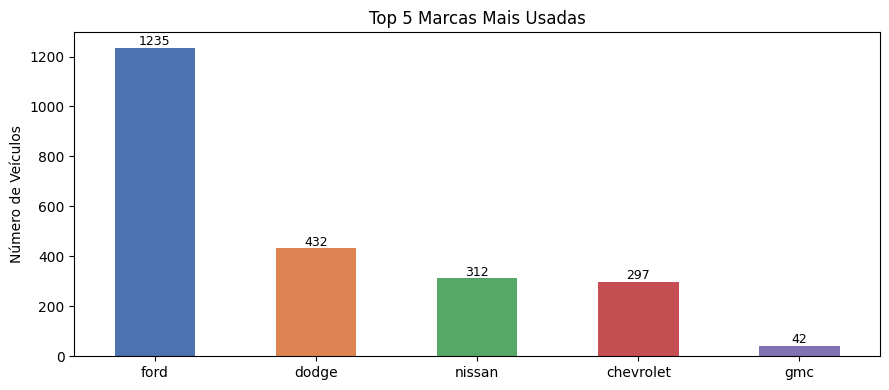

In [48]:
marcas_mais_usadas = df['brand'].value_counts()

top_5_marcas = marcas_mais_usadas.head(5)

palette = sns.color_palette("deep", len(top_5_marcas))

plt.figure(figsize=(9, 4))
ax = top_5_marcas.plot(kind='bar', color=palette)

for i, v in enumerate(top_5_marcas):
    ax.text(i, v + -1, str(v), ha='center', va='bottom', fontsize=9) 

plt.title('Top 5 Marcas Mais Usadas')
plt.xlabel('')
plt.ylabel('Número de Veículos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()